In [26]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


In [27]:
# Load dataset
df = pd.read_excel(r"C:\Users\naray\OneDrive\Pictures\Desktop\01. My Learning\new\smart-travel-advisor\data\raw_docs\Flight_Price_Data\Data_Train.xlsx")
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [29]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


Features¶

Airline -->>-->--> The name of the Airline

Date_of_Journey --> The Date of the Journey

Source -->-->-->--> The source from which the service begins

Destination -->--> The Destination where the service begins

Route -->-->-->--> The route taken by the flight to reach the destination

Dep_Time -->-->--> The Time when the journey start from the source

Arrival_Time --> Time for Arrival for the destination

Duration -->-->--> Total Duration of Flight

Total_Stops --> Total stops between the source and destination

Additional_Info --> Aditional information about the flight

Price -->-->-->--> The Price of the Ticket

In [30]:
#Checking Null values
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [31]:
#drop missing values
df.dropna(inplace=True)


In [32]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [34]:
#describe numerical Values
df.describe()


,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [35]:
df.duplicated().sum()

np.int64(220)

In [36]:
# drop the duplicate rows only
df.drop_duplicates(inplace=True, keep='first')


In [37]:
df.duplicated().sum()


np.int64(0)

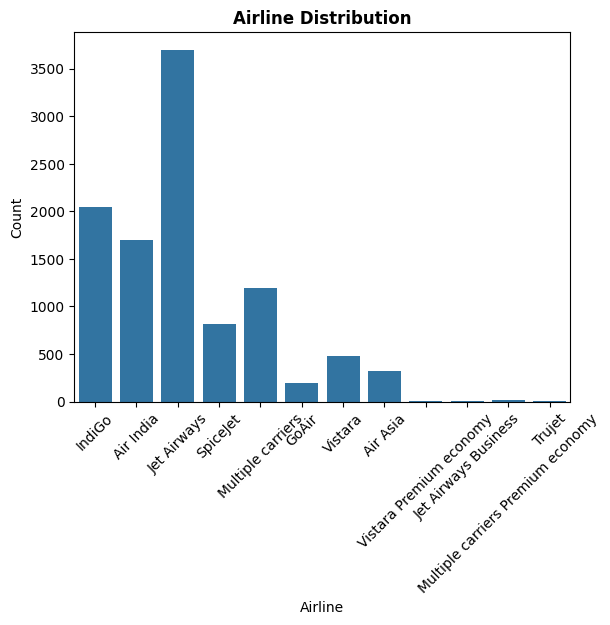

In [38]:
sns.countplot(x="Airline", data=df)

plt.title("Airline Distribution", fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.show()


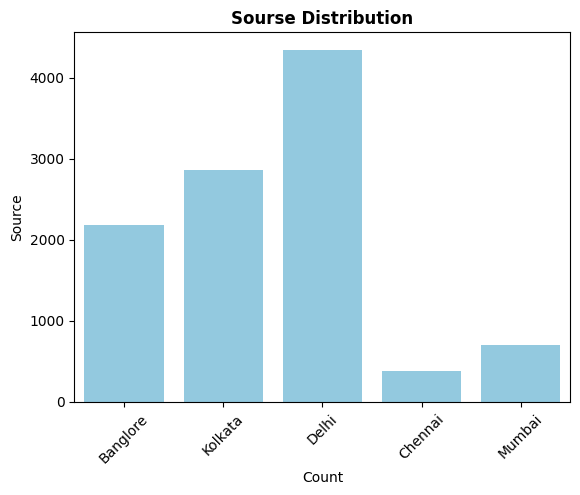

In [39]:
sns.countplot(x="Source", data=df , color="skyblue")

plt.title("Sourse Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Source")
plt.xticks(rotation=45)

plt.show()

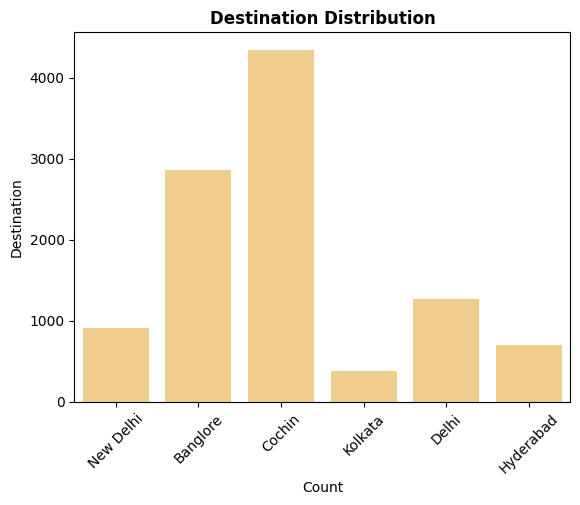

In [40]:
sns.countplot(x=df["Destination"] , color="orange" , alpha=0.5)

plt.title("Destination Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.xticks(rotation=45)
plt.show()

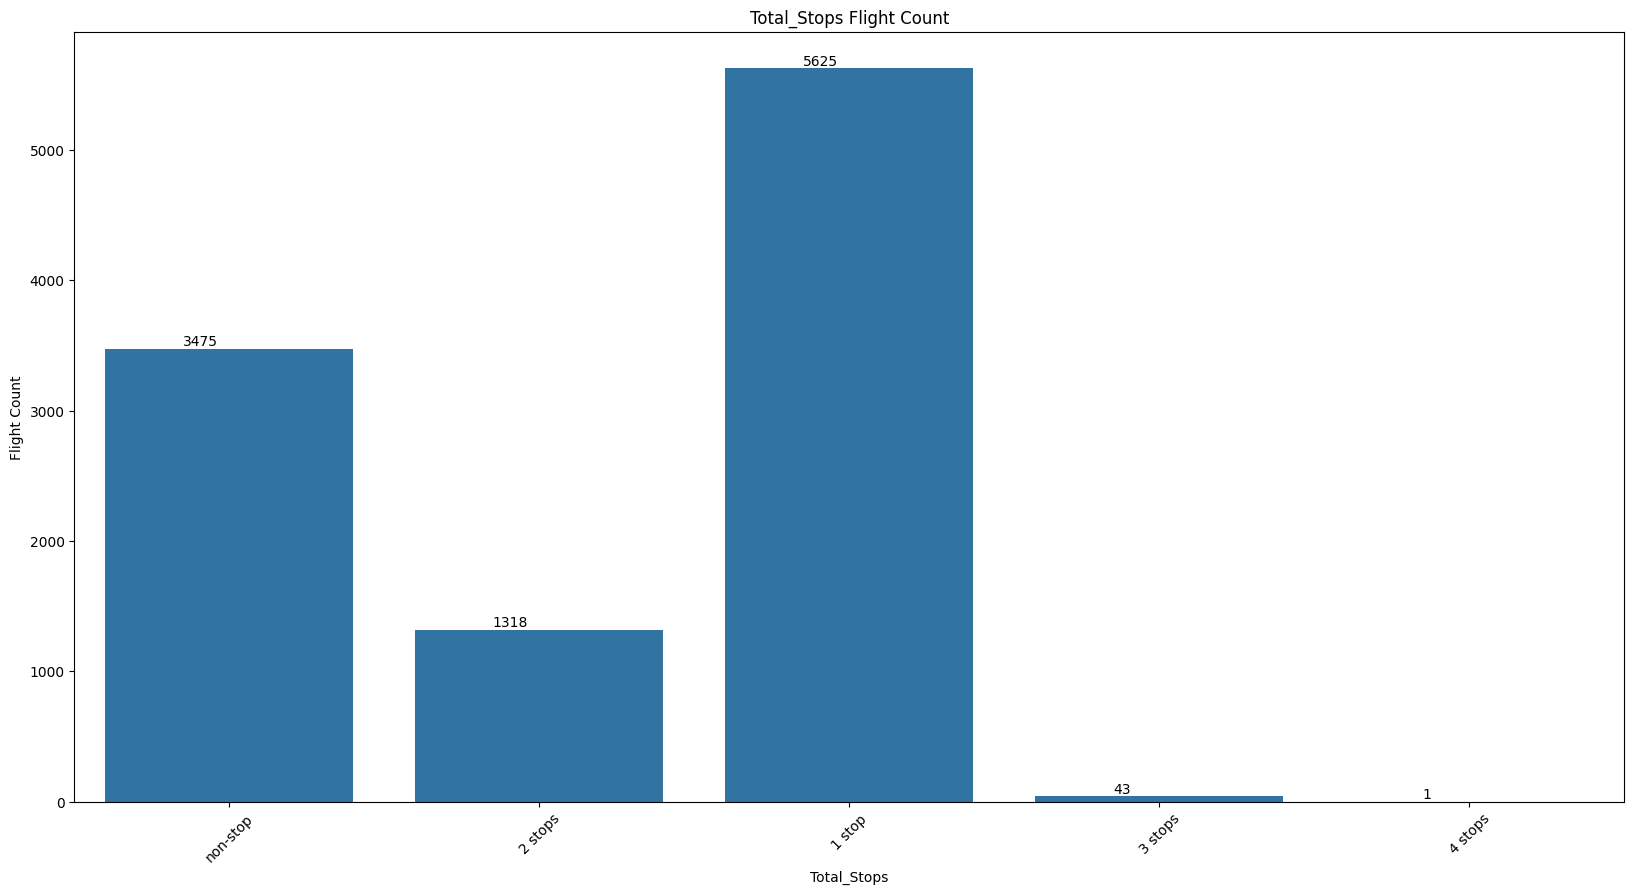

In [41]:
#Plotting count plot for stops in Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Total_Stops')
# Set labels and title for the plot
plt.xlabel('Total_Stops')
plt.ylabel('Flight Count')
plt.title('Total_Stops Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [42]:
# Top 10 used Routes and visualize using barplot

top_routes = df["Route"].value_counts().sort_values(ascending = False)[:10]
top_routes

Route
DEL → BOM → COK    2376
BLR → DEL          1536
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
MAA → CCU           381
DEL → HYD → COK     326
DEL → BLR → COK     232
Name: count, dtype: int64

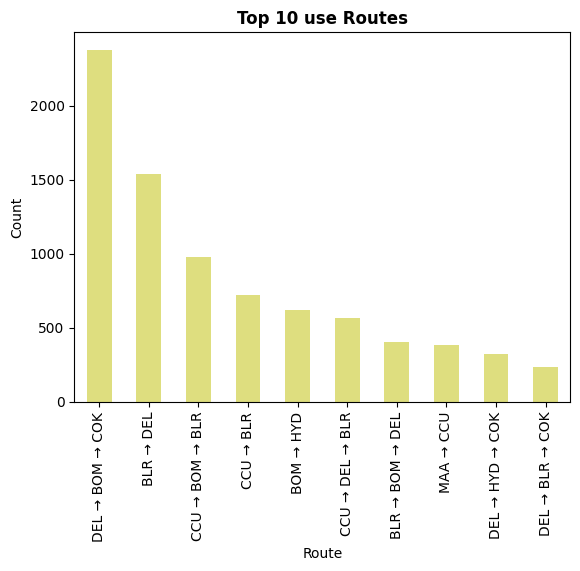

In [43]:
top_routes.plot(kind="bar" , color ="y" , alpha=0.5)

plt.title("Top 10 use Routes" , fontweight ="bold")
plt.ylabel("Count")

plt.show()

In [44]:
# Less used routes

bottom_routes = df["Route"].value_counts().sort_values(ascending = True)[:10]
bottom_routes

Route
BLR → HBX → BOM → NAG → DEL          1
CCU → IXB → DEL → BLR                1
BOM → JAI → DEL → HYD                1
BOM → VNS → DEL → HYD                1
BLR → CCU → BBI → HYD → VGA → DEL    1
BLR → BOM → IXC → DEL                1
BOM → BBI → HYD                      1
BOM → RPR → VTZ → HYD                1
BOM → UDR → DEL → HYD                1
BOM → DED → DEL → HYD                1
Name: count, dtype: int64

In [45]:
# Total_Stops visualize
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

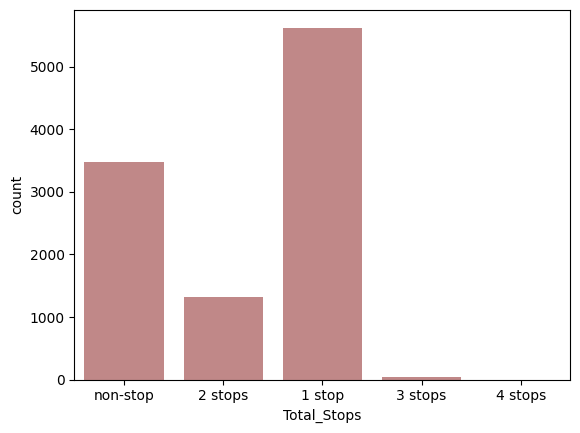

In [46]:
sns.countplot(x=df["Total_Stops"] , color="brown" ,alpha=0.6)
plt.show()

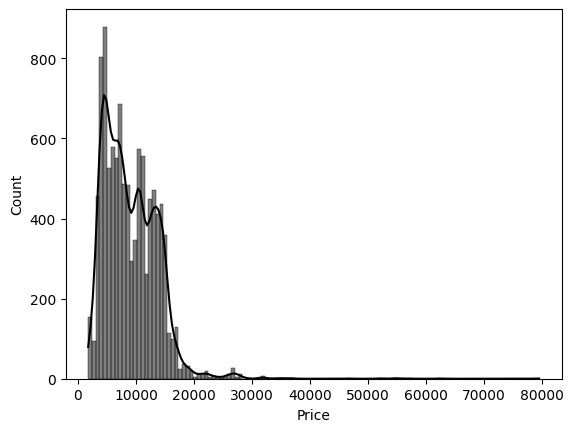

In [47]:
# plot "Price" feature using histplot

sns.histplot(x=df["Price"] , kde= True , color="black")

plt.show()

In [48]:
# Before Feature engieering

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [49]:
# Create a Tree Feawtures from "Date_of_Journey" Feature and drop this

df["Date"] = df["Date_of_Journey"].str.split("/").str[0]

df["Month"] = df["Date_of_Journey"].str.split("/").str[1]

df["Year"] = df["Date_of_Journey"].str.split("/").str[2]

In [50]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [51]:
# Drop "Date_of_Journey"

df.drop("Date_of_Journey", inplace=True, axis=1)


In [52]:
# Convert All String  to Int

df["Date"] = df["Date"].astype(int)

df["Month"] = df["Month"].astype(int)

df["Year"] = df["Year"].astype(int)

In [53]:
#  donot need of date in "Arrival_Time" so remove only take 'time"
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]

In [54]:
# create a two new features "Arrival_hour" and "Arrival_min" from "Arrival_Time"
df["Arrival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arrival_min"] = df["Arrival_Time"].str.split(":").str[1]

In [55]:
# and Drop "Arrival_Time"
df.drop("Arrival_Time", axis =1 ,inplace =True)

In [56]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [57]:
# convert into int
df["Arrival_hour"] = df["Arrival_hour"].astype(int)
df["Arrival_min"] = df["Arrival_min"].astype(int)

In [58]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [59]:
df["Dep_Time"].unique()


array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [60]:
# create a two new features "Dep_hour" and "Dep_min" from "Dep_Time"
df["Dep_hour"] = df["Dep_Time"].str.split(":").str[0]
df["Dep_min"] = df["Dep_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
df.drop("Dep_Time", axis =1 ,inplace =True)
# convert into int
df["Dep_hour"] = df["Dep_hour"].astype(int)
df["Dep_min"] = df["Dep_min"].astype(int)

In [61]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [62]:
df["Additional_Info"].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [63]:
# create "Duration_hour" featur from "Duration"

df["Duration_hour"] = df["Duration"].str.split(" ").str[0]
df["Duration_hour"] = df["Duration_hour"].str.split("h").str[0]

# Create "Duration_min" feature

df["Duration_min"] = df["Duration"].str.split(" ").str[1]
df["Duration_min"] = df["Duration_min"].str.split("m").str[0]

# Drop Duration feature

df.drop("Duration" ,axis = 1 , inplace =True)

In [64]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25


In [65]:
df["Duration_min"].unique()


array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [66]:
df["Duration_hour"].unique()


array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [67]:
df["Duration_min"] = df["Duration_min"].replace(np.nan , "0")
df["Duration_hour"] = df["Duration_hour"].replace("5m" , "5")



# convert in int

df["Duration_min"] = df["Duration_min"].replace(np.nan , "0")
df["Duration_hour"] = df["Duration_hour"].replace("5m" , "5")

In [68]:
# Create a new 5 feature from "Route"

df["Route_1"] = df["Route"].str.split(" → ").str[0]
df["Route_2"] = df["Route"].str.split(" → ").str[1]
df["Route_3"] = df["Route"].str.split(" → ").str[2]
df["Route_4"] = df["Route"].str.split(" → ").str[3]
df["Route_5"] = df["Route"].str.split(" → ").str[4]



df["Route_1"].fillna("None" , inplace =True)
df["Route_2"].fillna("None" , inplace =True)
df["Route_3"].fillna("None" , inplace =True)
df["Route_4"].fillna("None" , inplace =True)
df["Route_5"].fillna("None" , inplace =True)

# Drop "Route features"

df.drop("Route" , axis =1 ,inplace =True)

In [69]:
df.head(2)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None


In [70]:
# After feature engineering

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Total_Stops      10462 non-null  object
 4   Additional_Info  10462 non-null  object
 5   Price            10462 non-null  int64 
 6   Date             10462 non-null  int64 
 7   Month            10462 non-null  int64 
 8   Year             10462 non-null  int64 
 9   Arrival_hour     10462 non-null  int64 
 10  Arrival_min      10462 non-null  int64 
 11  Dep_hour         10462 non-null  int64 
 12  Dep_min          10462 non-null  int64 
 13  Duration_hour    10462 non-null  object
 14  Duration_min     10462 non-null  object
 15  Route_1          10462 non-null  object
 16  Route_2          10462 non-null  object
 17  Route_3          10462 non-null  obj

In [71]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
Duration_hour      0
Duration_min       0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [72]:
df.drop("Year",axis = 1,inplace = True)


In [73]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,4,45,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,22,25,19,55,2,30,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,23,20,20,45,2,35,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,11,20,8,20,3,0,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,14,10,11,30,2,40,BLR,DEL,None,None,None


## Label Encoder

In [74]:
label = LabelEncoder()


In [75]:
for i in df.columns:

    if df[i].dtype == "object":

        df[i] = label.fit_transform(df[i])

In [76]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,4,8,3897,24,3,1,10,22,20,11,10,0,10,21,10,4
1,1,3,0,1,8,7662,1,5,13,15,5,50,40,4,2,20,1,3,4
2,4,2,1,1,8,13882,9,6,4,25,9,25,10,0,3,27,4,5,4
3,3,3,0,0,8,6218,12,5,23,30,18,5,38,4,2,29,3,10,4
4,3,0,5,0,8,13302,1,3,21,35,16,50,33,8,0,29,7,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,4,22,25,19,55,11,5,2,5,21,10,4
10679,1,3,0,4,8,4145,27,4,23,20,20,45,11,6,2,5,21,10,4
10680,4,0,2,4,8,7229,27,4,11,20,8,20,22,0,0,10,21,10,4
10681,10,0,5,4,8,12648,1,3,14,10,11,30,11,7,0,10,21,10,4


In [77]:
df = df.reset_index()


In [78]:
df.head(10)

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3,0,5,4,8,3897,24,3,1,10,22,20,11,10,0,10,21,10,4
1,1,1,3,0,1,8,7662,1,5,13,15,5,50,40,4,2,20,1,3,4
2,2,4,2,1,1,8,13882,9,6,4,25,9,25,10,0,3,27,4,5,4
3,3,3,3,0,0,8,6218,12,5,23,30,18,5,38,4,2,29,3,10,4
4,4,3,0,5,0,8,13302,1,3,21,35,16,50,33,8,0,29,7,10,4
5,5,8,3,0,4,8,3873,24,6,11,25,9,0,11,4,2,5,21,10,4
6,6,4,0,5,0,5,11087,12,3,10,25,18,55,6,5,0,6,7,10,4
7,7,4,0,5,0,8,22270,1,3,5,5,8,0,13,9,0,6,7,10,4
8,8,4,0,5,0,5,11087,12,3,10,25,8,55,17,5,0,6,7,10,4
9,9,6,2,1,0,8,8625,27,5,19,15,11,25,40,10,3,6,6,10,4


In [79]:
# seprate dependent and independent features

x = df.drop("Price" , axis =1)

y= df["Price"]

In [80]:
print(f"shape of x is {x.shape}")

print(f"shape of y is {y.shape}")

shape of x is (10462, 19)
shape of y is (10462,)


In [81]:
x_train,x_test , y_train,y_test = train_test_split(x,y , test_size = 0.25 , random_state = 42)

In [82]:
print(f"shape of x_train is {x_train.shape}")

print(f"shape of x_test is {x_test.shape}")

print(f"shape of y_train is {y_train.shape}")

print(f"shape of y_test is {y_test.shape}")

shape of x_train is (7846, 19)
shape of x_test is (2616, 19)
shape of y_train is (7846,)
shape of y_test is (2616,)


In [83]:
# 📦 Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

In [84]:
# 📈 Evaluation
def evaluate(model_name, y_test, y_pred):
    print(f"\n📊 {model_name} Performance:")
    print("✅ R2 Score:", r2_score(y_test, y_pred))
    print("✅ MAE:", mean_absolute_error(y_test, y_pred))


In [99]:
x_test

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
2138,2150,4,0,5,0,8,6,3,8,15,8,0,16,2,0,6,7,10,4
3749,3784,8,3,0,4,8,6,6,0,40,22,20,11,3,2,5,21,10,4
713,714,3,3,0,4,8,18,3,8,20,5,30,11,10,2,5,21,10,4
7459,7558,4,4,3,4,5,24,3,17,20,15,50,0,5,1,15,21,10,4
7316,7413,8,0,2,4,8,27,4,12,20,9,30,11,10,0,10,21,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,9533,4,3,0,0,5,24,3,22,35,21,10,17,4,2,6,3,10,4
8027,8141,1,2,1,0,8,6,3,9,25,12,30,12,11,3,28,6,10,4
4844,4895,4,3,0,0,8,18,5,18,0,20,25,13,6,2,10,3,10,4
9379,9550,4,3,0,0,8,1,5,8,15,21,10,2,9,2,6,3,10,4


In [85]:
evaluate("Random Forest", y_test, rf_preds)


📊 Random Forest Performance:
✅ R2 Score: 0.8951714706830529
✅ MAE: 700.2035588685015


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import numpy as np



In [87]:
rng = np.random.RandomState(42)

In [88]:
param_dist = {
    'n_estimators': list(rng.randint(100, 501, 10)),            # 10 values between 100–500
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [89]:
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,              # 🔁 Number of combinations to try
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,              # Use all CPUs
    scoring='neg_mean_absolute_error',
    random_state=42
)

random_search.fit(x_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,30
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [90]:
print("✅ Best Parameters Found:")
print(random_search.best_params_)

print("\n📉 Best MAE on CV:", -random_search.best_score_)


✅ Best Parameters Found:
{'n_estimators': np.int32(314), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}

📉 Best MAE on CV: 789.5828969648329


In [91]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("\n📊 Performance on Test Data:")
print("✅ R² Score:", r2_score(y_test, y_pred))
print("✅ MAE:", mean_absolute_error(y_test, y_pred))



📊 Performance on Test Data:
✅ R² Score: 0.8980657619446246
✅ MAE: 689.15415159431


In [92]:
import joblib

# Save tuned Random Forest model into models folder
joblib.dump(best_rf, r"C:\Users\naray\OneDrive\Pictures\Desktop\01. My Learning\new\smart-travel-advisor\models\flight_price_model_rf.joblib")
print("✅ Tuned model saved to: models/flight_price_model_rf_tuned.pkl")



✅ Tuned model saved to: models/flight_price_model_rf_tuned.pkl


In [93]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
import joblib
import os
import numpy as np


In [94]:
# Reproducible random state
rng = np.random.RandomState(42)

xgb_param_dist = {
    'n_estimators': list(rng.randint(100, 501, 10)),       # 100–500
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1, 5],
}


In [95]:
xgb_model = XGBRegressor(random_state=42, objective="reg:squarederror")

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=30,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    random_state=42
)

xgb_random_search.fit(x_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'n_estimators': [np.int32(202), np.int32(448), ...], ...}"
,n_iter,30
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [96]:
best_xgb = xgb_random_search.best_estimator_

y_pred_xgb = best_xgb.predict(x_test)

print("📈 XGBoost Tuned Results:")
print("✅ R² Score:", r2_score(y_test, y_pred_xgb))
print("✅ MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("✅ Best Params:", xgb_random_search.best_params_)


📈 XGBoost Tuned Results:
✅ R² Score: 0.8909191489219666
✅ MAE: 717.677001953125
✅ Best Params: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': np.int32(171), 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [97]:
print("MSE " ,mean_squared_error(y_pred_xgb ,y_test))

print("MAE " ,mean_absolute_error(y_pred_xgb ,y_test))

print("RMSE " ,np.sqrt(mean_absolute_error(y_pred_xgb ,y_test)))

MSE  2329015.25
MAE  717.677001953125
RMSE  26.78949424593762


In [98]:

# Save tuned Random Forest model into models folder
joblib.dump(best_rf, r"C:\Users\naray\OneDrive\Pictures\Desktop\01. My Learning\new\smart-travel-advisor\models\flight_price_model_xgb.joblib")
print("✅ Tuned model saved to: models/flight_price_model_rf_tuned.pkl")



✅ Tuned model saved to: models/flight_price_model_rf_tuned.pkl
